<a href="https://colab.research.google.com/github/craiggossen/food-sales-prediction/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 1
-Craig Gossen


##Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/02 Week 2: Pandas/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

##Data Cleaning

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item_Weight' and 'Outlet_Size' both have NaN data


In [11]:
#'Item_Weight'
df['Item_Weight'].value_counts(ascending = True)


5.400      1
7.685      1
6.520      1
9.420      1
5.885      2
          ..
9.300     68
11.800    76
13.650    77
17.600    82
12.150    86
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
df['Item_Weight'].describe().round(2)

count    7060.00
mean       12.86
std         4.64
min         4.56
25%         8.77
50%        12.60
75%        16.85
max        21.35
Name: Item_Weight, dtype: float64

In [13]:
#Since the range of the data is fairly tight (4.56 to 21.35) with mean near the midpoint, it appears outliers are not a factor. 
#Will replace NaN with median 
df['Item_Weight'].fillna(df['Item_Weight'].median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [14]:
#'Outlet_Size'
df['Outlet_Size'].value_counts(ascending = True)

High       932
Small     2388
Medium    2793
Name: Outlet_Size, dtype: int64

In [15]:
#Due to size of missing data in 'Outlet_Size' (~2400 lines out of 8523), the NaN will be set to 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [16]:
df['Outlet_Size'].value_counts(ascending = True)

High        932
Small      2388
Missing    2410
Medium     2793
Name: Outlet_Size, dtype: int64

There are no NaN values left in the dataframe! 😀

Address the potential data name errors. 

In [17]:
df['Item_Fat_Content'].value_counts(ascending = True)

low fat     112
reg         117
LF          316
Regular    2889
Low Fat    5089
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df['Item_Fat_Content'].value_counts(ascending = True)
#,('reg','Regular'),('LF', 'Low Fat')

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Outlet_Sales'].value_counts().sort_index(ascending = True)

33.2900       2
33.9558       1
34.6216       1
35.2874       1
36.6190       2
             ..
10306.5840    1
10993.6896    1
11445.1020    1
12117.5600    1
13086.9648    1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Remaining columns of data appear accurate and ready to explore! ✨

Obtain the summary statistics of useful numberical column.

In [22]:
df['Item_Weight'].describe()

count                                                  8523
unique                                                  416
top       <bound method NDFrame._add_numeric_operations....
freq                                                   1463
Name: Item_Weight, dtype: object

In [23]:
df['Item_MRP'].describe().round(2)

count    8523.00
mean      140.99
std        62.28
min        31.29
25%        93.83
50%       143.01
75%       185.64
max       266.89
Name: Item_MRP, dtype: float64

In [25]:
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

##Exploratory Visuals

Useful data may include 'Item_Outlet_Sales' (total_sales = df['Item_Outlet_Sales'].cumsum()), by Outlet_Type or by Item_Type

In [30]:
total_sales = df['Item_Outlet_Sales'].cumsum()


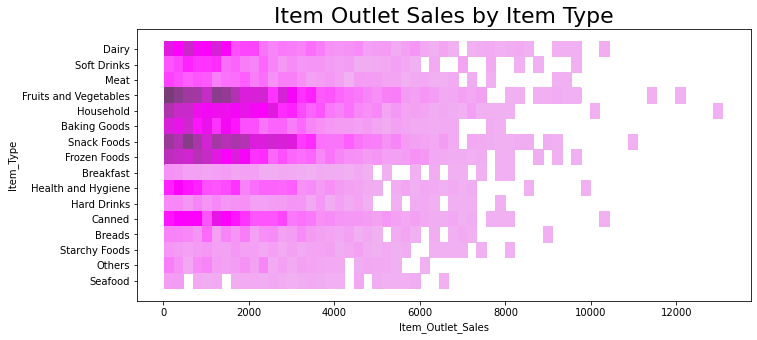


 Outlets that sell Fruits and Vegetables, Frozen Foods, and Snack Foods have relatively lower item sales.


In [67]:
f, ax = plt.subplots(figsize=(11, 5))
sns.histplot(data = df, 
             x = 'Item_Outlet_Sales',
             y = 'Item_Type',
             color = 'purple');
ax.set_title('Item Outlet Sales by Item Type', size = 22)

plt.show()

print('\n Outlets that sell Fruits and Vegetables, Frozen Foods, and Snack Foods have relatively lower item sales.')

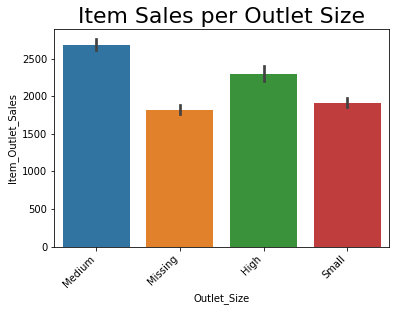

In [81]:
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right');

ax.set_title('Item Sales per Outlet Size', size = 22)

plt.show()

print('\n ')

##Explanatory Visuals